# UNIT 3 CAPSTONE

Data: https://www.kaggle.com/airbnb/seattle/data

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from IPython.display import Image
from IPython.display import display
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.feature_selection import f_classif, f_regression, SelectKBest


import time

from IPython.display import Image

## Import Data

In [2]:
dfC = pd.read_csv('Seattlecalendar.csv')
dfR = pd.read_csv('Seattlereviews.csv')
dfL = pd.read_csv('Seattlelistings.csv')

## Clean Data 

### Clean Reviews Data 

In [3]:
dfR.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [4]:
display(dfR.head())

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [5]:
dfR['month'] = dfR['date'].str[5:7]
dfR['month'] = pd.to_numeric(dfR.month, errors='coerce')

In [6]:
#display(dfR.head())

In [7]:
#Make everything lower case...

dfR['comments'] = dfR['comments'].str.lower()

#Remove punctuation...

dfR['comments'] = dfR['comments'].str.replace(r'\.|\!|\?|\'|,|-|\(|\)', "",).fillna('')

In [8]:
keywords_a = ['awesome', 'perfect', 'cozy', 'easy', 'enjoy', 'comfortable', 'pleased', 'spacious', 
              'sunny', 'newly', 'highly', 'accommodate', 'remodeled', 'friendly', 'gourmet', 
              ' kitchen', 'living room', 'bedroom', 'bathroom', 'bath', 'baths', 'renovated',
              'light', 'public transportation', 'houses', 'parking', 'restaurant', 'shops', 'cafes',
              'view', 'seattle', 'downtown', 'urban', 'bed', 'groceries', 'deck', 'puget sound', 
              'ballard', 'woodland', 'green lake', 'tv', 'internet', 'furnished', 'lake union', 
              'tea', 'guest', 'bonus', 'extra']

for key in keywords_a:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    dfR[str(key)] = dfR.comments.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [9]:
#display(dfR.head())

In [10]:
dfR = dfR.drop(['id', 'date', 'reviewer_id', 'reviewer_name','comments'],1)

In [11]:
dfR.dtypes

listing_id               int64
month                    int64
awesome                   bool
perfect                   bool
cozy                      bool
easy                      bool
enjoy                     bool
comfortable               bool
pleased                   bool
spacious                  bool
sunny                     bool
newly                     bool
highly                    bool
accommodate               bool
remodeled                 bool
friendly                  bool
gourmet                   bool
 kitchen                  bool
living room               bool
bedroom                   bool
bathroom                  bool
bath                      bool
baths                     bool
renovated                 bool
light                     bool
public transportation     bool
houses                    bool
parking                   bool
restaurant                bool
shops                     bool
cafes                     bool
view                      bool
seattle 

### Clean Calendar Data

In [12]:
dfC['month'] = dfC['date'].str[5:7]
dfC['month'] = pd.to_numeric(dfC.month, errors='coerce')

In [13]:
## convert date to date time object
dfC['date'] = pd.to_datetime(dfC['date'])

In [14]:
##Creating binary/categorical variable with df['available']  
#df['availability'] = np.where(df.loc[df['available'] == 't']['available'], 1, 0)
#df.loc[df['available'] == 't']['available']

d = {'t': 1, 'f': 0}
dfC['availability'] = dfC['available'].map(d)

In [15]:
## Transform string column into to numeric column 
dfC['price'] = pd.to_numeric(dfC['price'].str.replace('\$', ''), errors='coerce')

In [16]:
dfC = dfC.drop(['available'],1)

In [17]:
dfC.dtypes

listing_id               int64
date            datetime64[ns]
price                  float64
month                    int64
availability             int64
dtype: object

### Clean Listings Data

#### Transform Summary in Listings Data

In [18]:
dfL_sum = dfL[['summary']]

In [19]:
dfL_sum = dfL_sum.fillna('')

In [20]:
#Make everything lower case...

dfL_sum['summary'] = dfL_sum['summary'].str.lower()

#Remove punctuation...

dfL_sum['summary'] = dfL_sum['summary'].str.replace(r'\.|\!|\?|\'|,|-|\(|\)', "",)

In [21]:
keywords_a = ['awesome', 'perfect', 'cozy', 'easy', 'enjoy', 'comfortable', 'pleased', 'spacious', 
              'sunny', 'newly', 'highly', 'accommodate', 'remodeled', 'friendly', 'gourmet', 
              ' kitchen', 'living room', 'bedroom','bathroom', 'bath', 'baths', 'renovated',
              'light', 'public transportation', 'houses', 'parking', 'restaurant', 'shops', 'cafes',
              'view', 'seattle', 'downtown', 'urban', 'bed', 'groceries', 'deck', 'puget sound', 
              'ballard', 'woodland', 'green lake', 'tv', 'internet', 'furnished', 'lake union', 
              'tea', 'guest', 'bonus', 'extra']

for key in keywords_a:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    dfL_sum[str(key)] = dfL_sum.summary.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [22]:
dfL_sum.dtypes

summary                  object
awesome                    bool
perfect                    bool
cozy                       bool
easy                       bool
enjoy                      bool
comfortable                bool
pleased                    bool
spacious                   bool
sunny                      bool
newly                      bool
highly                     bool
accommodate                bool
remodeled                  bool
friendly                   bool
gourmet                    bool
 kitchen                   bool
living room                bool
bedroom                    bool
bathroom                   bool
bath                       bool
baths                      bool
renovated                  bool
light                      bool
public transportation      bool
houses                     bool
parking                    bool
restaurant                 bool
shops                      bool
cafes                      bool
view                       bool
seattle 

In [23]:
display(dfL_sum['summary'].head())

0                                                     
1    chemically sensitive weve removed the irritant...
2    new modern house built in 2013  spectacular su...
3    a charming apartment that sits atop queen anne...
4    cozy family craftman house in beautiful neighb...
Name: summary, dtype: object

#### Separate Strings from Numeric in Listings Data 

We can drop the features __'thumbnail_url', 'medium_url','xl_picture_url','host_thumbnail_url','host_picture_url'__ since they are url and of no use.  
We can drop the features __'scrape_id', 'host_id' and _scraped ones__ since they are of no use too.   

In [24]:
## Drop host_total_listings_count b/c similar to host_listings_count
dfL['host_listings_count'].equals(dfL['host_total_listings_count']) 

True

In [25]:
## Not droping calculated_host_listings_count b/c similar to host_listings_count
dfL['host_listings_count'].equals(dfL['calculated_host_listings_count']) 

False

In [26]:
## Drop _id and _url and _scrape from the Listing Data   

dfL = dfL.drop(['scrape_id', 'host_id', 'calendar_last_scraped', 'last_scraped', 'thumbnail_url', 'medium_url','xl_picture_url','host_thumbnail_url',
                'listing_url','host_picture_url', 'picture_url', 'host_url', 'host_total_listings_count'],1)

In [27]:
## Select all that are not object  and are object   
dfLstring = dfL.select_dtypes(include=['object'])
dfLnumeric = dfL.select_dtypes(exclude=['object'])

The features:  
__instant_bookable, host_is_superhost, require_guest_profile_picture, require_guest_phone_verification, host_has_profile_pic, host_identity_verified__    
all have 2 unique values and can be transformed into numerical that is binary/categorical variables.   

In [28]:
## Change to categorical /binary
dfLnumeric['instant_bookable'] = np.where(dfLstring['instant_bookable']=='t',1,0)
dfLnumeric['host_is_superhost'] = np.where(dfLstring['host_is_superhost']=='t',1,0)
dfLnumeric['require_guest_profile_picture'] = np.where(dfLstring['require_guest_profile_picture']=='t',1,0)
dfLnumeric['require_guest_phone_verification'] = np.where(dfLstring['require_guest_phone_verification']=='t',1,0)
dfLnumeric['host_has_profile_pic'] = np.where(dfLstring['host_has_profile_pic']=='t',1,0)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [29]:
## Transform string column into to numeric column 
dfLnumeric['price'] = pd.to_numeric(dfLstring['price'].str.replace('\$', ''), errors='coerce')

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
# Count nulls 
null_count = dfLnumeric.isnull().sum()
null_count[null_count>0]

host_listings_count               2
bathrooms                        16
bedrooms                          6
beds                              1
square_feet                    3721
review_scores_rating            647
review_scores_accuracy          658
review_scores_cleanliness       653
review_scores_checkin           658
review_scores_communication     651
review_scores_location          655
review_scores_value             656
license                        3818
reviews_per_month               627
price                             1
dtype: int64

From this we can see that __license__ and __square_feet__ have mostly null values.
We are also going to remover __latitude__ and	__longitude__ b/c they are geographic data/categorical and not continuous     
So we can remove them from the data __dfLnumeric__

In [31]:
dfL = dfLnumeric.drop(['license','square_feet','latitude','longitude'],1)

In [32]:
dfL = pd.concat([dfL, dfL_sum],1).drop(['summary',],1)


In [33]:
dfL.dtypes

id                                    int64
host_listings_count                 float64
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                                float64
guests_included                       int64
minimum_nights                        int64
maximum_nights                        int64
availability_30                       int64
availability_60                       int64
availability_90                       int64
availability_365                      int64
number_of_reviews                     int64
review_scores_rating                float64
review_scores_accuracy              float64
review_scores_cleanliness           float64
review_scores_checkin               float64
review_scores_communication         float64
review_scores_location              float64
review_scores_value                 float64
calculated_host_listings_count        int64
reviews_per_month               

In [34]:
dfC.dtypes

listing_id               int64
date            datetime64[ns]
price                  float64
month                    int64
availability             int64
dtype: object

## Join the Calendar and Listings data 

In [35]:
df = dfC.set_index('listing_id').join(dfL.set_index('id'), lsuffix='_calendar', rsuffix='_listing', sort=False)

In [36]:
display(df.head())

,date,price_calendar,month,availability,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,...,woodland,green lake,tv,internet,furnished,lake union,tea,guest,bonus,extra
3335,2016-01-04,NaN,1,0,4.0,4,1.0,2.0,2.0,2,...,False,False,False,False,False,False,False,False,False,False
3335,2016-01-05,NaN,1,0,4.0,4,1.0,2.0,2.0,2,...,False,False,False,False,False,False,False,False,False,False
3335,2016-01-06,NaN,1,0,4.0,4,1.0,2.0,2.0,2,...,False,False,False,False,False,False,False,False,False,False
3335,2016-01-07,NaN,1,0,4.0,4,1.0,2.0,2.0,2,...,False,False,False,False,False,False,False,False,False,False
3335,2016-01-08,NaN,1,0,4.0,4,1.0,2.0,2.0,2,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df.dtypes

date                                datetime64[ns]
price_calendar                             float64
month                                        int64
availability                                 int64
host_listings_count                        float64
accommodates                                 int64
bathrooms                                  float64
bedrooms                                   float64
beds                                       float64
guests_included                              int64
minimum_nights                               int64
maximum_nights                               int64
availability_30                              int64
availability_60                              int64
availability_90                              int64
availability_365                             int64
number_of_reviews                            int64
review_scores_rating                       float64
review_scores_accuracy                     float64
review_scores_cleanliness      

In [38]:
## Join the df1 and Review data 

In [39]:
##The Joining of the Review data and df

#df2 = df.join(dfR.set_index('listing_id'), rsuffix='_review', sort=True)

In [40]:
print(df.shape)

(1393570, 80)


In [41]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

price_calendar                 459725
host_listings_count               730
bathrooms                        5840
bedrooms                         2190
beds                              365
review_scores_rating           236155
review_scores_accuracy         240170
review_scores_cleanliness      238345
review_scores_checkin          240170
review_scores_communication    237615
review_scores_location         239075
review_scores_value            239440
reviews_per_month              228855
price_listing                     365
dtype: int64

We note that the features __'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness','review_scores_checkin', 'review_scores_communication','review_scores_location', 'review_scores_value' __
they have a lot of null value.  
Meaning that the information was not provided or there were no responses   
We will fill those values below  

In [42]:
## review not filled means its best possible 
df['review_scores_value'].fillna(value = df['review_scores_value'].median(), inplace=True)
df['review_scores_rating'].fillna(value = df['review_scores_rating'].median(), inplace=True)
df['review_scores_accuracy'].fillna(value = df['review_scores_accuracy'].median(), inplace=True)
df['review_scores_cleanliness'].fillna(value = df['review_scores_cleanliness'].median(), inplace=True)
df['review_scores_checkin'].fillna(value = df['review_scores_checkin'].median(), inplace=True)
df['review_scores_communication'].fillna(value = df['review_scores_communication'].median(), inplace=True)
df['review_scores_location'].fillna(value = df['review_scores_location'].median(), inplace=True)
df['review_scores_value'].fillna(value = df['review_scores_value'].median(), inplace=True)
df['reviews_per_month'].fillna(value = df['reviews_per_month'].median(), inplace=True)


In [43]:
## Assumptions: Airbnb don't change prices 
## For the empty values in price_calendar replace by the value of price_listing 
df['price_calendar'].fillna(value = df['price_listing'], inplace=True)

In [44]:
# Count nulls 
null_count = df.isnull().sum()
null_count[null_count>0]

price_calendar          365
host_listings_count     730
bathrooms              5840
bedrooms               2190
beds                    365
price_listing           365
dtype: int64

In [45]:
df_correlation_matrix  = df.corr()

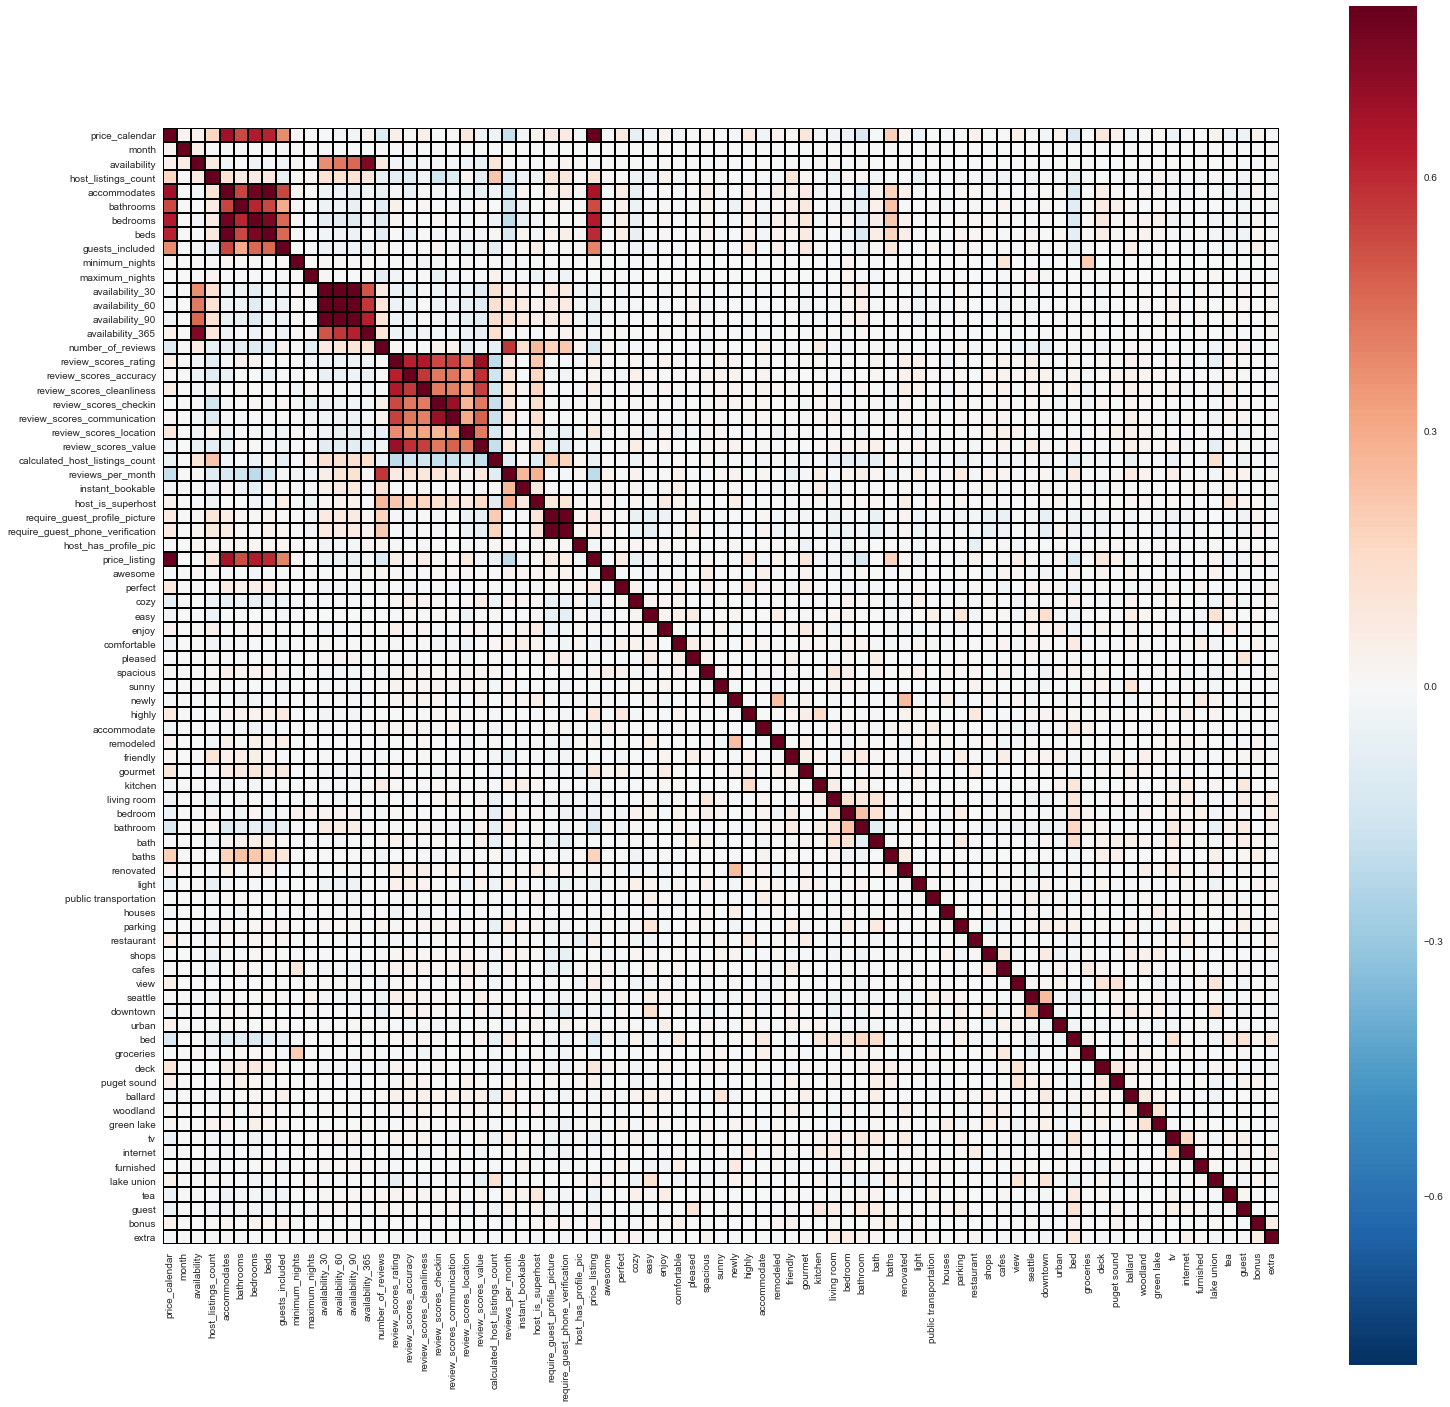

In [46]:
plt.figure(figsize=(25, 25))
sns.heatmap(df_correlation_matrix, vmax=.8, square=True, linecolor='black', linewidths=1)
plt.show()

From this correlation matrix,    
we note that the fatures __'availability_30', 'availability_60', 'availability_90','availability_365',__  
have a strong correlation with __availability__ which is our outcome matrix.  
It will be a good idea to make sure they are not features that we will be using in our modelling. 

Talk about multicollinearity and mention taking care of it during Feature selection

Explain how why I am keeping accomodates and the words strongly related to it.. 
This tells me how many bedrooms and bathrooms and beds we have in the Airbnb which may not always be in the summary, may not always the number of people the listing may accomodate.  

With review_scores since the outcome is availibilty the other derivatives are not important. 
So i will just keep review_scores_rating and remove __'review_scores_accuracy','review_scores_rating', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication'__

Just make sure to talk about those strong relations and keep both    
__'require_guest_identification', 'require_guest_phone_verification'__ just keep both  



In [47]:
df[['review_scores_accuracy','review_scores_rating', 'review_scores_cleanliness','review_scores_checkin','review_scores_communication']].head()

,review_scores_accuracy,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication
3335,10.0,96.0,10.0,10.0,10.0
3335,10.0,96.0,10.0,10.0,10.0
3335,10.0,96.0,10.0,10.0,10.0
3335,10.0,96.0,10.0,10.0,10.0
3335,10.0,96.0,10.0,10.0,10.0


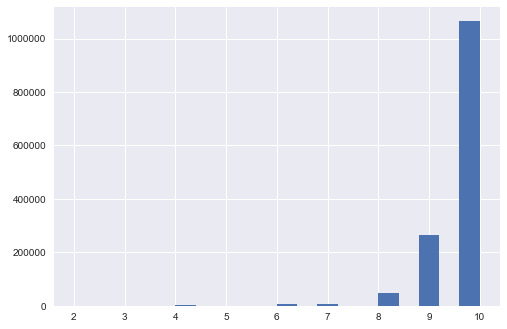

In [48]:
plt.hist(df['review_scores_accuracy'], bins = 20)
plt.show()

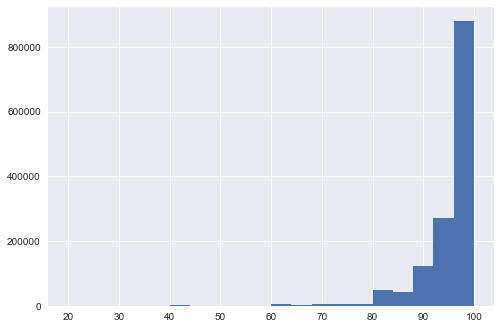

In [49]:
plt.hist(df['review_scores_rating'], bins = 20)
plt.show()

ValueError: max must be larger than min in range parameter.

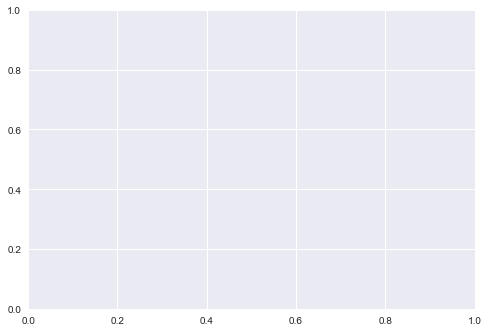

In [145]:
plt.hist(df['bathrooms'], bins = 20)
plt.show()

In [50]:
## For Non bool do histogram of the features (makes you aware of things you might see in your models)
##histograms for floats and barplots for ints 

In [51]:
features = list(df_correlation_matrix['availability'].loc[lambda s: (abs(s) > .001) & (abs(s)< 0.02)].index)
print('The list  of important features are:')
print(features)
print('The numbers of important features are: ', len(features))

The list  of important features are:
['bathrooms', 'beds', 'minimum_nights', 'maximum_nights', 'review_scores_checkin', 'reviews_per_month', 'instant_bookable', 'host_is_superhost', 'require_guest_profile_picture', 'host_has_profile_pic', 'price_listing', 'awesome', 'perfect', 'cozy', 'easy', 'enjoy', 'comfortable', 'pleased', 'spacious', 'sunny', 'newly', 'highly', 'accommodate', 'remodeled', 'friendly', 'gourmet', ' kitchen', 'living room', 'bedroom', 'bathroom', 'bath', 'baths', 'renovated', 'light', 'public transportation', 'houses', 'parking', 'restaurant', 'shops', 'cafes', 'view', 'seattle', 'downtown', 'urban', 'bed', 'groceries', 'deck', 'puget sound', 'ballard', 'woodland', 'green lake', 'tv', 'internet', 'furnished', 'lake union', 'tea', 'guest', 'bonus', 'extra']
The numbers of important features are:  59


This are just the features that have a linear relation with __availability__

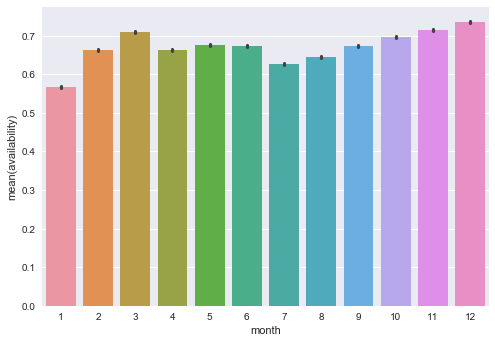

In [131]:
ax = sns.barplot(x="month", y="availability", data=df)

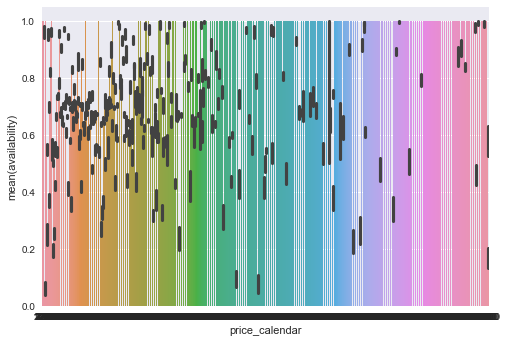

In [144]:
sns.barplot(x="price_calendar", y="availability", data=df);

## Create Training and Test Sets

In [52]:
X = df.drop(['availability','availability_30', 'availability_60', 'availability_90','availability_365',
             'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
             'review_scores_communication','price_listing','date'], axis = 1)
Y = df['availability']

In [53]:
X.columns

Index(['price_calendar', 'month', 'host_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month',
       'instant_bookable', 'host_is_superhost',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_has_profile_pic', 'awesome', 'perfect', 'cozy', 'easy', 'enjoy',
       'comfortable', 'pleased', 'spacious', 'sunny', 'newly', 'highly',
       'accommodate', 'remodeled', 'friendly', 'gourmet', ' kitchen',
       'living room', 'bedroom', 'bathroom', 'bath', 'baths', 'renovated',
       'light', 'public transportation', 'houses', 'parking', 'restaurant',
       'shops', 'cafes', 'view', 'seattle', 'downtown', 'urban', 'bed',
       'groceries', 'deck', 'puget sound', 'ballard', 'woodland', 'green lake',
       'tv', '

In [54]:
# Count nulls 
null_count = X.isnull().sum()
null_count[null_count>0]

price_calendar          365
host_listings_count     730
bathrooms              5840
bedrooms               2190
beds                    365
dtype: int64

In [55]:
##  Remove infinity and NAN and replace by median 
X = X.replace([np.inf, -np.inf], np.nan)
X = X.apply(lambda x: x.replace(np.nan, x.median()))

In [56]:
from sklearn.cross_validation import train_test_split

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [57]:
# splitting our data into train and testing groups
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [58]:
target = Y_train 
data = X_train

In [59]:
display(X_train.head())

,price_calendar,month,host_listings_count,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,...,woodland,green lake,tv,internet,furnished,lake union,tea,guest,bonus,extra
7860710,110.0,4,5.0,4,1.0,1.0,1.0,2,1,1125,...,False,False,False,False,True,False,False,False,False,False
6776229,129.0,10,2.0,4,1.0,1.0,2.0,1,2,1125,...,False,False,False,False,False,False,False,False,False,False
6837338,80.0,10,1.0,2,1.0,1.0,1.0,1,2,4,...,False,False,False,False,False,False,False,False,False,False
2865992,88.0,4,1.0,2,1.0,1.0,1.0,1,2,1125,...,False,False,False,False,False,False,False,True,False,False
1159226,184.0,4,8.0,4,1.0,2.0,3.0,1,3,90,...,False,False,False,False,False,False,False,False,False,False


In [128]:
##  All the numeric in X_train
X_train_num = X_train.select_dtypes(exclude= ['bool'])

In [129]:
X_train_num.columns

Index(['price_calendar', 'month', 'host_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month',
       'instant_bookable', 'host_is_superhost',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_has_profile_pic'],
      dtype='object')

In [60]:
# All the booleans in X_train
X_train_bool = X_train.select_dtypes(include= ['bool'])


In [61]:
X_train_bool.columns

Index(['awesome', 'perfect', 'cozy', 'easy', 'enjoy', 'comfortable', 'pleased',
       'spacious', 'sunny', 'newly', 'highly', 'accommodate', 'remodeled',
       'friendly', 'gourmet', ' kitchen', 'living room', 'bedroom', 'bathroom',
       'bath', 'baths', 'renovated', 'light', 'public transportation',
       'houses', 'parking', 'restaurant', 'shops', 'cafes', 'view', 'seattle',
       'downtown', 'urban', 'bed', 'groceries', 'deck', 'puget sound',
       'ballard', 'woodland', 'green lake', 'tv', 'internet', 'furnished',
       'lake union', 'tea', 'guest', 'bonus', 'extra'],
      dtype='object')

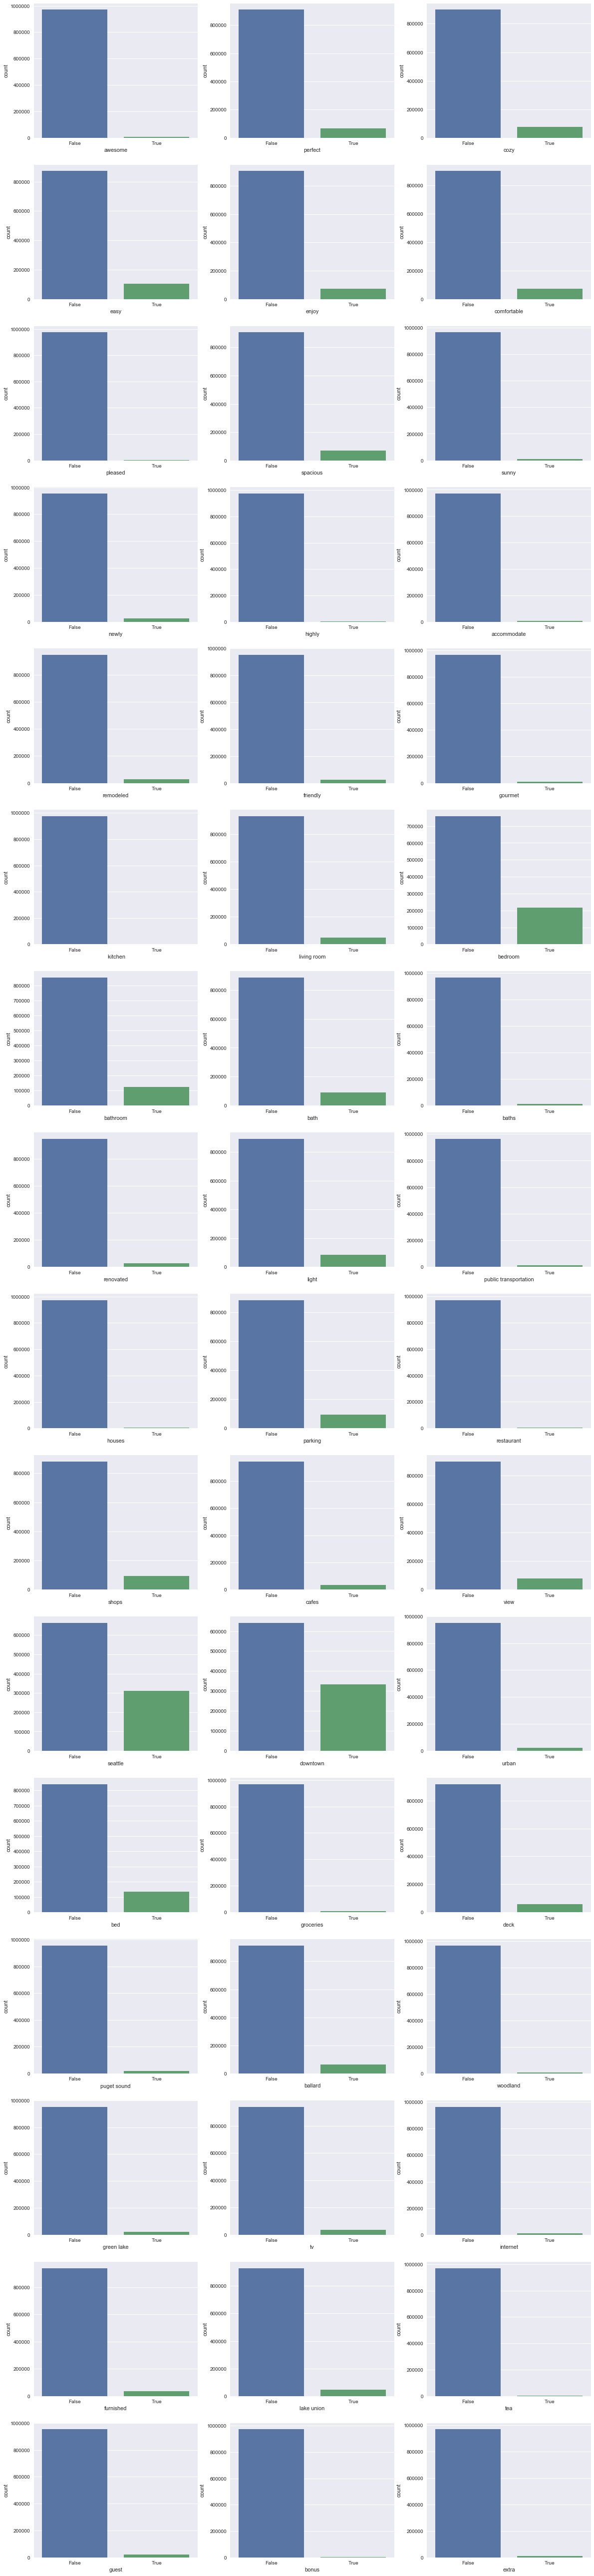

In [127]:
columns = list(X_train_bool.columns)
plt.figure(figsize=(20, 100))
for i, col in enumerate(columns):
    plt.subplot((len(X_train_bool.columns)//3) +1,3,i+1)
    x = col
    g = sns.countplot(x, data=X_trainb)
    plt.xlabel(col)

In [63]:
## Group features and see what plots we can do. 
## Multavariate Plots. 
## See how price changes with accomadates. 

## For booleans variables do count plots  

## price vs availability  /violinplot or boxplot
## month vs availability / barplot 
## 


In [64]:
display(Y_train.head())

7860710    1
6776229    0
6837338    0
2865992    1
1159226    1
Name: availability, dtype: int64

## Features Selection 

In [65]:
len(keywords_a)

48

In [66]:


### Random Forest Classifier 
rfc = ensemble.RandomForestClassifier(max_depth=10,max_features='auto', n_estimators=40)
start_time = time.clock() 
rfc.fit(X_train, Y_train)
print('Runtime for Random Forest: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

df_features = pd.DataFrame(rfc.feature_importances_)
df_features['features']= X_train.columns
df_features.sort_values(0,ascending = False)
best_Rfeatures = list(df_features.sort_values(0,ascending = False)['features'][:30])

print('\nScore on  Training Set: ' + str(rfc.score(X_train, Y_train)))
print('\nScore on  Test Set: ' + str(rfc.score(X_test, Y_test)))
print('\nThe numbers of important features we will use are: ', len(best_Rfeatures))
print('\nUsing Random Forest Classifier the 30 best features are: ')
print(best_Rfeatures)


## Select Kbest Features
selector = SelectKBest(f_classif, k=30)
start_time = time.clock()
selector.fit_transform(X_train, Y_train)
print('\nRuntime for SelectKbest: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.
names = X_train.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
df_features = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
best_Kfeatures = list(df_features.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])['Feat_names'])
print('\nThe numbers of important features we will use are: ', len(best_Kfeatures))
print('\nUsing SelectKbest the 30 best features are: ')    

print(best_Kfeatures)

Runtime for Random Forest: 145.60643800000003 seconds

Score on  Training Set: 0.732044830389

Score on  Test Set: 0.731796752226

The numbers of important features we will use are:  30

Using Random Forest Classifier the 30 best features are: 
['price_calendar', 'month', 'host_listings_count', 'number_of_reviews', 'maximum_nights', 'calculated_host_listings_count', 'reviews_per_month', 'review_scores_rating', 'bedrooms', 'accommodates', 'minimum_nights', 'guests_included', 'review_scores_value', 'beds', 'bathrooms', 'review_scores_location', 'host_is_superhost', 'require_guest_profile_picture', 'instant_bookable', 'require_guest_phone_verification', 'cozy', 'bathroom', 'seattle', 'bedroom', 'downtown', 'parking', 'light', 'view', 'bed', 'easy']

Runtime for SelectKbest: 18.22121599999997 seconds

The numbers of important features we will use are:  30

Using SelectKbest the 30 best features are: 
['calculated_host_listings_count', 'number_of_reviews', 'host_listings_count', 'review_sco

___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__    

Runtime for Random Forest: 145.60643800000003 seconds   

Score on  Training Set: 0.732044830389   

Score on  Test Set: 0.731796752226    

The numbers of important features we will use are:  30      

Using Random Forest Classifier the 30 best features are:       
['price_calendar', 'month', 'host_listings_count', 'number_of_reviews', 'maximum_nights',    'calculated_host_listings_count', 'reviews_per_month', 'review_scores_rating', 'bedrooms', 'accommodates',    'minimum_nights', 'guests_included', 'review_scores_value', 'beds', 'bathrooms',     'review_scores_location', 'host_is_superhost', 'require_guest_profile_picture', 'instant_bookable',    'require_guest_phone_verification', 'cozy', 'bathroom', 'seattle', 'bedroom', 'downtown', 'parking',     'light', 'view', 'bed', 'easy']     

Runtime for SelectKbest: 18.22121599999997 seconds     

The numbers of important features we will use are:  30    

Using SelectKbest the 30 best features are:       
['calculated_host_listings_count', 'number_of_reviews', 'host_listings_count', 'review_scores_value',    'month', 'price_calendar', 'review_scores_location', 'bedrooms', 'guests_included',     'review_scores_rating', 'require_guest_phone_verification', 'accommodates', 'host_has_profile_pic',     'require_guest_profile_picture', 'host_is_superhost', 'spacious', 'bedroom', 'bonus', 'bathroom', 'newly',    'guest', 'groceries', 'furnished', 'reviews_per_month', 'beds', 'view', 'restaurant', ' kitchen',    'tea', 'seattle']    

### Two new different Training sets

In [67]:
X_trainR = X_train.loc[:,best_Rfeatures]
X_trainK = X_train.loc[:,best_Kfeatures]
X_testR = X_test.loc[:,best_Rfeatures]
X_testK = X_test.loc[:,best_Kfeatures]

## Random Forest Classifier 

### Random Forest with RFeatures

In [68]:
# Set the start time for execution speed.
import time
start_time = time.clock() 

rfc = ensemble.RandomForestClassifier(max_depth=10,max_features='auto', n_estimators=40)

rfc.fit(X_trainR, Y_train)


print('Runtime for Random Forest with Rfeatures: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('\nScore on  Training Set: ' + str(rfc.score(X_trainR, Y_train)))

print('\nScore on  Test Set: ' + str(rfc.score(X_testR, Y_test)))

cv_train = cross_val_score(rfc, X_trainR, Y_train, cv=5)

### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, cv_train.std(), cv_train))




Runtime for Random Forest with Rfeatures: 146.56320900000003 seconds

Score on  Training Set: 0.747988465391

Score on  Test Set: 0.747870577007

Cross validation results: 74.904% ± 0.105% 
 
 [ 0.74995003  0.74726807  0.74974885  0.74980907  0.74839953]


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__      

Runtime for Random Forest with Rfeatures: 146.56320900000003 seconds   

Score on  Training Set: 0.747988465391    

Score on  Test Set: 0.747870577007   

Cross validation results: 74.904% ± 0.105%     
 
 [ 0.74995003  0.74726807  0.74974885  0.74980907  0.74839953]       

The model is not overfitting since it is not perfoming better on the Test Set in comparison to the training set.           

In [71]:
# saving model predictions
y_rfcR = rfc.predict(X_trainR)

In [72]:
print("Number of mislabeled points out of a total {} points : {}".format(X_trainR.shape[0], (Y_train != y_rfcR).sum()))

cm = confusion_matrix(Y_train, y_rfcR)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (Y_train == True).sum() 
a_neg = (Y_train == False).sum() 
p_pos = (y_rfcR == True).sum() 
p_neg = (y_rfcR == False).sum() 
tot = X_trainR.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))



Number of mislabeled points out of a total 975499 points : 245837


,Predict False,Predict True
Actual False,82930,238498
Actual True,7339,646732


False Positives (Type I error): 238498 (74.2%)
False Negatives (Type II error): 7339 (1.1%)


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__ 

Number of mislabeled points out of a total 975499 points : 245837   

False Positives (Type I error): 238498 (74.2%)   
False Negatives (Type II error): 7339 (1.1%)   
 
 
 We need to decrease the Type I errors

In [73]:
df_features = pd.DataFrame(rfc.feature_importances_)
df_features['features']= X_trainR.columns

df_features.sort_values(0,ascending = False)

,0,features
0,0.104871,price_calendar
3,0.099159,number_of_reviews
2,0.097552,host_listings_count
1,0.096102,month
6,0.077591,reviews_per_month
4,0.072501,maximum_nights
5,0.071963,calculated_host_listings_count
7,0.040904,review_scores_rating
8,0.036984,bedrooms
9,0.035447,accommodates


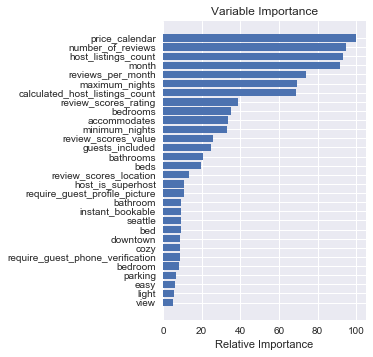

In [74]:
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_trainR.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

###  Random Forest with KFeatures

In [75]:
# Set the start time for execution speed.
import time
start_time = time.clock() 

rfc = ensemble.RandomForestClassifier(max_depth=10,max_features='auto', n_estimators=40)

rfc.fit(X_trainK, Y_train)


print('Runtime for Random Forest with Kfeatures: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('\nScore on  Training Set: ' + str(rfc.score(X_trainK, Y_train)))

print('\nScore on  Test Set: ' + str(rfc.score(X_testK, Y_test)))

cv_train = cross_val_score(rfc, X_trainK, Y_train, cv=5)


### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, cv_train.std(), cv_train))



Runtime for Random Forest with Kfeatures: 114.39116799999988 seconds

Score on  Training Set: 0.725604024197

Score on  Test Set: 0.725977166558

Cross validation results: 72.633% ± 0.219% 
 
 [ 0.72278461  0.72569452  0.72765761  0.72614929  0.72936304]


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__   

Runtime for Random Forest with Kfeatures: 114.39116799999988 seconds    
 
Score on  Training Set: 0.725604024197    

Score on  Test Set: 0.725977166558    

Cross validation results: 72.633% ± 0.219%    
 
 [ 0.72278461  0.72569452  0.72765761  0.72614929  0.72936304]    

     
It is not overfitting since the score on the Test Set is similar to the score on the training set.     

In [76]:
# saving model predictions
y_rfcK = rfc.predict(X_trainK)

In [77]:
print("Number of mislabeled points out of a total {} points : {}".format(X_trainK.shape[0], (Y_train != y_rfcK).sum()))

cm = confusion_matrix(Y_train, y_rfcK)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (Y_train == True).sum() 
a_neg = (Y_train == False).sum() 
p_pos = (y_rfcK == True).sum() 
p_neg = (y_rfcK == False).sum() 
tot = X_trainK.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))


Number of mislabeled points out of a total 975499 points : 267673


,Predict False,Predict True
Actual False,60409,261019
Actual True,6654,647417


False Positives (Type I error): 261019 (81.2%)
False Negatives (Type II error): 6654 (1.0%)


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__   

Number of mislabeled points out of a total 975499 points : 267673   

False Positives (Type I error): 261019 (81.2%)   
False Negatives (Type II error): 6654 (1.0%)  

__
for Random Forest with Rfeatures:     
False Positives (Type I error): 238498 (74.2%)   
False Negatives (Type II error): 7339 (1.1%)      
__ 


 The model is not overfitting and has a more type I errors than the one using RFeatures.    
 It is clear that we need to still improve our Type I errors (Reduce it).         

In [78]:
df_features = pd.DataFrame(rfc.feature_importances_)
df_features['features']= X_trainK.columns

df_features.sort_values(0,ascending = False)

,0,features
5,0.134827,price_calendar
1,0.112624,number_of_reviews
4,0.104139,month
2,0.102341,host_listings_count
23,0.093319,reviews_per_month
0,0.091306,calculated_host_listings_count
11,0.047808,accommodates
9,0.047021,review_scores_rating
7,0.045303,bedrooms
8,0.036869,guests_included


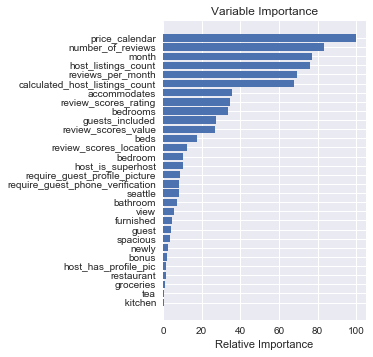

In [79]:
feature_importance = rfc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_trainK.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

##   Logistic Regression 

### Logistc Regression with RFeatures

In [80]:
import math
import sklearn
from sklearn.linear_model import LogisticRegression

In [81]:
start_time = time.clock()
ridgeregr = LogisticRegression(penalty='l2')
ridgeregr.fit(X_trainR, Y_train)
print('Runtime For Logistic Regression with RFeatures: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('\nScore on Training set: ' + str(ridgeregr.score(X_trainR, Y_train)))

print('\nScore on Test set: ' + str(ridgeregr.score(X_testR, Y_test)))

cv_train = cross_val_score(ridgeregr, X_trainR, Y_train, cv=5)

### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, cv_train.std(), cv_train))


Runtime For Logistic Regression with RFeatures: 39.91339199999993 seconds

Score on Training set: 0.670319498021

Score on Test set: 0.670785584267

Cross validation results: 67.026% ± 0.019% 
 
 [ 0.67056038  0.67028191  0.67025115  0.6699573   0.67023921]


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__     
__hyper params Regr = penalty = 'l2'__ 


Runtime For Logistic Regression with RFeatures: 39.91339199999993 seconds   

Score on Training set: 0.670319498021   

Score on Test set: 0.670785584267    

Cross validation results: 67.026% ± 0.019%     
 
 [ 0.67056038  0.67028191  0.67025115  0.6699573   0.67023921]    

The model is performing well on itself since the score isn't better on Test set.    
But the score is less than the score we got for Random Forest Classifier.    

In [82]:
# saving model predictions
y_ridgepredR = ridgeregr.predict(X_trainR)

In [83]:
print("Number of mislabeled points out of a total {} points : {}".format(X_trainR.shape[0], (Y_train != y_ridgepredR).sum()))

cm = confusion_matrix(Y_train, y_ridgepredR)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (Y_train == True).sum() 
a_neg = (Y_train == False).sum() 
p_pos = (y_ridgepredR == True).sum() 
p_neg = (y_ridgepredR == False).sum() 
tot = X_trainR.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))




Number of mislabeled points out of a total 975499 points : 321603


,Predict False,Predict True
Actual False,6907,314521
Actual True,7082,646989


False Positives (Type I error): 314521 (97.9%)
False Negatives (Type II error): 7082 (1.1%)


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__   
__hyper params Regr = penalty = 'l2'__ 


Number of mislabeled points out of a total 975499 points : 321603   

False Positives (Type I error): 314521 (97.9%)   
False Negatives (Type II error): 7082 (1.1%)       

One thing we can say is that the model predict well on itself that is because the score on training set and test set is about the same.      
We need to reduce the Type I errors. 

It is not performing better than the Random Forest Classifier 
__  
For Random Forest Classifier with RFeatures:    
Runtime for Random Forest with Rfeatures: 146.56320900000003 seconds            
False Positives (Type I error): 238498 (74.2%)      
False Negatives (Type II error): 7339 (1.1%)           
__

We can see that Random Forest classifier is performing better than the Ridge Regression.     
The one good thing is that the fit model takes less time to run for logistic Regression.     



In [84]:
Regr_features = pd.DataFrame(ridgeregr.coef_)

Regr_features = Regr_features.set_index(0).T
#Regr_features['best_features']= X.columns

#Regr_features.sort_values(0,ascending = False)
Regr_features

,0.00287865684998
1,0.034488
2,0.003364
3,0.007862
4,0.000011
5,0.051535
6,-0.050233
7,0.014242
8,-0.200235
9,-0.082811
10,0.001337


### Logistc Regression with KFeatures

In [86]:
start_time = time.clock()
ridgeregr = LogisticRegression(penalty='l2')
ridgeregr.fit(X_trainK, Y_train)
print('Runtime For Logistic Regression with KFeatures: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('\nScore on Training set: ' + str(ridgeregr.score(X_trainK, Y_train)))

print('\nScore on Test set: ' + str(ridgeregr.score(X_testK, Y_test)))

cv_train = cross_val_score(ridgeregr, X_trainK, Y_train, cv=5)

### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, cv_train.std(), cv_train))



Runtime For Logistic Regression with KFeatures: 33.37867000000006 seconds

Score on Training set: 0.671174445079

Score on Test set: 0.671718440169

Cross validation results: 67.105% ± 0.014% 
 
 [ 0.67108831  0.67097386  0.6709226   0.67098242  0.67130534]


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__    
__hyper params Regr = penalty = 'l2'__

Runtime For Logistic Regression with KFeatures: 33.37867000000006 seconds    

Score on Training set: 0.671174445079   

Score on Test set: 0.671718440169   

Cross validation results: 67.105% ± 0.014%     
 
 [ 0.67108831  0.67097386  0.6709226   0.67098242  0.67130534]    

The model is performing well on itself.         

In [87]:
# saving model predictions
y_ridgepredK = ridgeregr.predict(X_trainK)

In [88]:
print("Number of mislabeled points out of a total {} points : {}".format(X_trainK.shape[0], (Y_train != y_ridgepredK).sum()))

cm = confusion_matrix(Y_train, y_ridgepredK)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (Y_train == True).sum() 
a_neg = (Y_train == False).sum() 
p_pos = (y_ridgepredK == True).sum() 
p_neg = (y_ridgepredK == False).sum() 
tot = X_trainK.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))





Number of mislabeled points out of a total 975499 points : 320769


,Predict False,Predict True
Actual False,8816,312612
Actual True,8157,645914


False Positives (Type I error): 312612 (97.3%)
False Negatives (Type II error): 8157 (1.2%)


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__   
__ hyper params Regr = penalty = 'l2'__   


Number of mislabeled points out of a total 975499 points : 320769    

False Positives (Type I error): 312612 (97.3%)      
False Negatives (Type II error): 8157 (1.2%)               


One thing we can say is that the model predict well on itself that is because the score on training set and data is about the same.      
We need to reduce the Type I errors. 
       


We can see that Random Forest classifier is still performing better than the Ridge Regression. 

__
For Random Forest Classifier with KFeatures:        
Runtime for Random Forest with Kfeatures: 114.39116799999988 seconds         
False Positives (Type I error): 261019 (81.2%)    
False Negatives (Type II error): 6654 (1.0%)         
__


The one good thing is that the fit model takes about half the amount of time to run.




In [91]:
Regr_features = pd.DataFrame(ridgeregr.coef_)

Regr_features = Regr_features.set_index(0).T
#Regr_features['best_features']= X.columns

#Regr_features.sort_values(0,ascending = False)
Regr_features

,0.0499670428593
1,0.007580
2,0.003376
3,-0.119241
4,0.033423
5,0.003011
6,-0.097641
7,-0.200124
8,-0.042319
9,0.010717
10,0.375483


## Gradient Boosting  

### Gradient Boosting with RFeatures

In [92]:
# We'll make 50 iterations, use 5-deep trees, and set our loss function.

start_time = time.clock()
params = {'n_estimators': 50,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_trainR, Y_train)

print('Runtime for Gradient Boosting with RFeatures: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('\nScore on  Training Set: ' + str(clf.score(X_trainR, Y_train)))

print('\nScore on  Test Set: ' + str(clf.score(X_testR, Y_test)))


cv_train = cross_val_score(clf, X_trainR, Y_train, cv=5)


### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, cv_train.std(), cv_train))




predict_train = clf.predict(X_trainR)
predict_test = clf.predict(X_testR)


### To be removed #### 
# Accuracy tables.
table_train = pd.crosstab(Y_train, predict_train, margins=True)
table_test = pd.crosstab(Y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    '\nTraining set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Runtime for Gradient Boosting with KFeatures: 386.33381800000006 seconds

Score on  Training Set: 0.733607107747

Score on  Test Set: 0.734272408275

Cross validation results: 73.465% ± 0.152% 
 
 [ 0.73646983  0.73363403  0.73303947  0.73651326  0.73360704]

Training set accuracy:
Percent Type I errors: 23.90%
Percent Type II errors: 2.74%

Test set accuracy:
Percent Type I errors: 23.88%
Percent Type II errors: 2.69%


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__     
__hyper params GB = 50 iterations, use 5-deep trees, and set our loss function = deviance.__    

Runtime for Gradient Boosting with KFeatures: 386.33381800000006 seconds    

Score on  Training Set: 0.733607107747    

Score on  Test Set: 0.734272408275    

Cross validation results: 73.465% ± 0.152%     
 
 [ 0.73646983  0.73363403  0.73303947  0.73651326  0.73360704]             

The set is performing well on itself since the score on Test set isn't bigger than on the Training set.     

In [93]:
# saving model predictions
y_clfR = clf.predict(X_trainR)

In [94]:
print("Number of mislabeled points out of a total {} points : {}".format(X_trainR.shape[0], (Y_train != y_clfR).sum()))

cm = confusion_matrix(Y_train, y_clfR)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (Y_train == True).sum() 
a_neg = (Y_train == False).sum() 
p_pos = (y_clfR == True).sum() 
p_neg = (y_clfR == False).sum() 
tot = X_trainR.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))


Number of mislabeled points out of a total 975499 points : 259866


,Predict False,Predict True
Actual False,88253,233175
Actual True,26691,627380


False Positives (Type I error): 233175 (72.5%)
False Negatives (Type II error): 26691 (4.1%)


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__     
__hyper params GB = 50 iterations, use 5-deep trees, and set our loss function = deviance.__  


Number of mislabeled points out of a total 975499 points : 259866    

False Positives (Type I error): 233175 (72.5%)   
False Negatives (Type II error): 26691 (4.1%)       


The model is performing well on itself.   
There doesn't seem to be any overfittng.
Type I errors need to be reduced.     

__
For Random Forest Classifier with RFeatures:    
Runtime for Random Forest with Rfeatures: 146.56320900000003 seconds            
False Positives (Type I error): 238498 (74.2%)      
False Negatives (Type II error): 7339 (1.1%)  
__

__
For Ridge Regression with  RFeatures:       
Runtime For Logistic Regression with RFeatures: 39.91339199999993 seconds      
False Positives (Type I error): 314521 (97.9%)   
False Negatives (Type II error): 7082 (1.1%)          
__      


We see that there is a great improvement from with Gradient Boosting for Type I error error in both previous models.    
For Type II errors, it is clear that Random Forest Classifier gives us the less Type II errors.       
It does take more time to perforem Gradient Descent    

In [95]:
clf_features = pd.DataFrame(clf.feature_importances_)
clf_features['features']= X_trainR.columns

clf_features.sort_values(0,ascending = False)


,0,features
0,0.151351,price_calendar
6,0.112908,reviews_per_month
1,0.106363,month
3,0.095418,number_of_reviews
2,0.092930,host_listings_count
4,0.050522,maximum_nights
5,0.047879,calculated_host_listings_count
8,0.046575,bedrooms
10,0.039622,minimum_nights
9,0.038827,accommodates


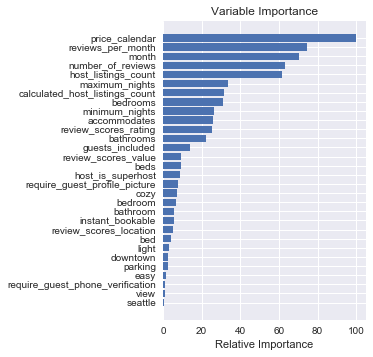

In [96]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_trainR.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Gradient Boosting  with KFeatures

In [97]:
# We'll make 50 iterations, use 5-deep trees, and set our loss function = deviance.

start_time = time.clock()
params = {'n_estimators': 50,
          'max_depth': 5,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_trainK, Y_train)

print('Runtime for Gradient Boosting with KFeatures: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('\nScore on  Training Set: ' + str(clf.score(X_trainK, Y_train)))

print('\nScore on  Test Set: ' + str(clf.score(X_testK, Y_test)))


cv_train = cross_val_score(clf, X_trainK, Y_train, cv=5)

### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, cv_train.std(), cv_train))



predict_train = clf.predict(X_trainK)
predict_test = clf.predict(X_testK)

# Accuracy tables.
table_train = pd.crosstab(Y_train, predict_train, margins=True)
table_test = pd.crosstab(Y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    '\nTraining set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Runtime for Gradient Boosting with KFeatures: 368.2461929999995 seconds

Score on  Training Set: 0.724877216686

Score on  Test Set: 0.725450940151

Cross validation results: 72.275% ± 0.115% 
 
 [ 0.72483995  0.72160431  0.72186058  0.72250498  0.72293554]

Training set accuracy:
Percent Type I errors: 25.29%
Percent Type II errors: 2.22%

Test set accuracy:
Percent Type I errors: 25.26%
Percent Type II errors: 2.20%


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__        
__hyper params GB = 50 iterations, use 5-deep trees, and set our loss function = deviance.__     

Runtime for Gradient Boosting with KFeatures: 368.2461929999995 seconds    

Score on  Training Set: 0.724877216686    

Score on  Test Set: 0.725450940151    

Cross validation results: 72.275% ± 0.115%     
 
 [ 0.72483995  0.72160431  0.72186058  0.72250498  0.72293554]    

The model is predicting well on itself.      

In [98]:
# saving model predictions
y_clfK = clf.predict(X_trainK)

In [99]:
y_predK = y_clfK

In [100]:
print("Number of mislabeled points out of a total {} points : {}".format(X_trainK.shape[0], (Y_train != y_clfK).sum()))

cm = confusion_matrix(Y_train, y_clfK)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (Y_train == True).sum() 
a_neg = (Y_train == False).sum() 
p_pos = (y_clfK == True).sum() 
p_neg = (y_clfK == False).sum() 
tot = X_trainK.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))


Number of mislabeled points out of a total 975499 points : 268382


,Predict False,Predict True
Actual False,74748,246680
Actual True,21702,632369


False Positives (Type I error): 246680 (76.7%)
False Negatives (Type II error): 21702 (3.3%)


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__   
__hyper params GB = 50 iterations, use 5-deep trees, and set our loss function = deviance.__     

Number of mislabeled points out of a total 975499 points : 268382      

False Positives (Type I error): 246680 (76.7%)       
False Negatives (Type II error): 21702 (3.3%)          


The model is performing well on itself.   
There doesn't seem to be any overfittng.
We need to see if we can get our Type I error to be reduced even more.


__
For Gradient Bootings with RFeatures:      
Runtime for Gradient Boosting with RFeatures: 386.33381800000006 seconds
False Positives (Type I error): 233175 (72.5%)   
False Negatives (Type II error): 26691 (4.1%)  
__


__
For Random Forest Classifier with KFeatures:        
Runtime for Random Forest with Kfeatures: 114.39116799999988 seconds         
False Positives (Type I error): 261019 (81.2%)       
False Negatives (Type II error): 6654 (1.0%)              
__

__
For Ridge Regression with KFeatures:       
Runtime For Logistic Regression with KFeatures: 33.37867000000006 seconds      
False Positives (Type I error): 312612 (97.3%)        
False Negatives (Type II error): 8157 (1.2%)                   
__   


We see that there is a great improvement with Gradient Boosting for Type I error error compare to both previous models.          
It does take more time to perforem Gradient Descent.   
When comparing Gradient Boosting with RFeatures and with KFeatures, Gradient boosting with RFeatures gives the less amount of Type I errors. 
So we can use that to see if we can get even better results with different hyper Parameters.   

In [101]:
clf_features = pd.DataFrame(clf.feature_importances_)
clf_features['features']= X_trainK.columns

clf_features.sort_values(0,ascending = False)


,0,features
5,0.185523,price_calendar
23,0.150105,reviews_per_month
2,0.108350,host_listings_count
4,0.105103,month
1,0.102946,number_of_reviews
9,0.052436,review_scores_rating
7,0.051866,bedrooms
0,0.040809,calculated_host_listings_count
11,0.039507,accommodates
8,0.026017,guests_included


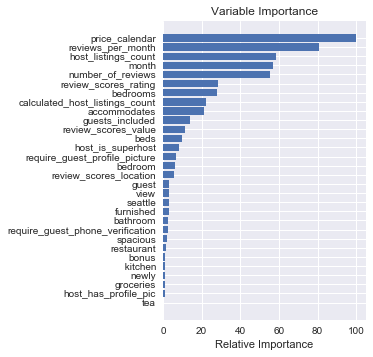

In [102]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_trainK.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Gradient Boosting with Updated hyper Parameters and RFeatures.

### Gradient Boosting  with 50 iterations, use 10-deep trees, and set our loss function to deviance

In [109]:
# We'll make 50 iterations, use 10-deep trees, and set our loss function.

start_time = time.clock()
params = {'n_estimators': 50,
          'max_depth': 10,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_trainR, Y_train)

print('Runtime for Gradient Boosting with RFeatures: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('\nScore on  Training Set: ' + str(clf.score(X_trainR, Y_train)))

print('\nScore on  Test Set: ' + str(clf.score(X_testR, Y_test)))


cv_train = cross_val_score(clf, X_trainR, Y_train, cv=5)


### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, cv_train.std(), cv_train))




predict_train = clf.predict(X_trainR)
predict_test = clf.predict(X_testR)

# Accuracy tables.
table_train = pd.crosstab(Y_train, predict_train, margins=True)
table_test = pd.crosstab(Y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    '\nTraining set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Runtime for Gradient Boosting with RFeatures: 4092.5195510000003 seconds

Score on  Training Set: 0.904520660708

Score on  Test Set: 0.903169557324

Cross validation results: 90.239% ± 0.154% 
 
 [ 0.90331674  0.89978473  0.90238339  0.90205998  0.90441776]

Training set accuracy:
Percent Type I errors: 8.02%
Percent Type II errors: 1.53%

Test set accuracy:
Percent Type I errors: 8.10%
Percent Type II errors: 1.59%


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__        
__hyper params GB = 50 iterations, use 10-deep trees, and set our loss function = deviance.__       

Runtime for Gradient Boosting with RFeatures: 4092.5195510000003 seconds        

Score on  Training Set: 0.904520660708         

Score on  Test Set: 0.903169557324    

Cross validation results: 90.239% ± 0.154%    
 
 [ 0.90331674  0.89978473  0.90238339  0.90205998  0.90441776]  
 
 The model is not overfitting since the score on the Test set isn't bigger than the score on the Training set.
 
 
 Check the (std*2) for all models   and see if that is big or not  (change it in code)
 

In [110]:
# saving model predictions
y1_clfR = clf.predict(X_trainR)

In [111]:
print("Number of mislabeled points out of a total {} points : {}".format(X_trainR.shape[0], (Y_train != y1_clfR).sum()))

cm = confusion_matrix(Y_train, y1_clfR)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (Y_train == True).sum() 
a_neg = (Y_train == False).sum() 
p_pos = (y1_clfR == True).sum() 
p_neg = (y1_clfR == False).sum() 
tot = X_trainR.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))


Number of mislabeled points out of a total 975499 points : 93140


,Predict False,Predict True
Actual False,243227,78201
Actual True,14939,639132


False Positives (Type I error): 78201 (24.3%)
False Negatives (Type II error): 14939 (2.3%)


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__     
__hyper params GB = 50 iterations, use 5-deep trees, and set our loss function = deviance.__  


Number of mislabeled points out of a total 975499 points : 93140    
 
 
False Positives (Type I error): 78201 (24.3%)    
False Negatives (Type II error): 14939 (2.3%)            


The model is performing well on itself.   
There doesn't seem to be any overfittng.
Type I errors need to be reduced.     

__
For Random Forest Classifier with RFeatures:    
Runtime for Random Forest with Rfeatures: 146.56320900000003 seconds            
False Positives (Type I error): 238498 (74.2%)      
False Negatives (Type II error): 7339 (1.1%)  
__

__
For Ridge Regression with  RFeatures:       
Runtime For Logistic Regression with RFeatures: 39.91339199999993 seconds      
False Positives (Type I error): 314521 (97.9%)   
False Negatives (Type II error): 7082 (1.1%)          
__      


We see that there is a great improvement with the changes in Hyper parameters for Gradient Boosting.   
We were able to reduce the Type I error to 20% and the Type II errors went up to 2.3%        

In [112]:
clf_features = pd.DataFrame(clf.feature_importances_)
clf_features['features']= X_trainR.columns

clf_features.sort_values(0,ascending = False)


,0,features
0,0.164980,price_calendar
6,0.129108,reviews_per_month
3,0.094047,number_of_reviews
1,0.084844,month
4,0.061391,maximum_nights
7,0.054526,review_scores_rating
10,0.042641,minimum_nights
2,0.039954,host_listings_count
9,0.037132,accommodates
11,0.028703,guests_included


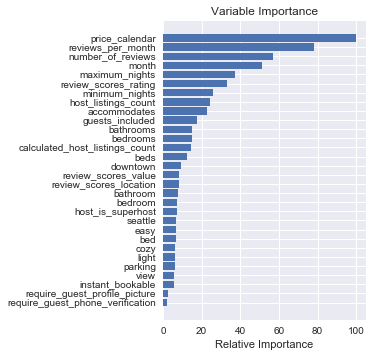

In [113]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_trainR.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Gradient Boosting  with 100 iterations, use 10-deep trees, and set our loss function

In [114]:
# We'll make 100 iterations, use 10-deep trees, and set our loss function.

start_time = time.clock()
params = {'n_estimators': 100,
          'max_depth': 10,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_trainR, Y_train)

print('Runtime for Gradient Boosting with RFeatures: '+'%s seconds'% (time.clock() - start_time)) # End time for execution speed.

print('\nScore on  Training Set: ' + str(clf.score(X_trainR, Y_train)))

print('\nScore on  Test Set: ' + str(clf.score(X_testR, Y_test)))


cv_train = cross_val_score(clf, X_trainR, Y_train, cv=5)


### Put this with the Cros validation score.
plusminus = u"\u00B1"
 
print('\nCross validation results: {:.3%} {} {:.3%} \n \n {}'.format(cv_train.mean(), plusminus, cv_train.std(), cv_train))




predict_train = clf.predict(X_trainR)
predict_test = clf.predict(X_testR)

# Accuracy tables.
table_train = pd.crosstab(Y_train, predict_train, margins=True)
table_test = pd.crosstab(Y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    '\nTraining set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.2%}\n'
    'Percent Type II errors: {:.2%}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Runtime for Gradient Boosting with RFeatures: 7149.300540999997 seconds

Score on  Training Set: 0.942255194521

Score on  Test Set: 0.940998060138

Cross validation results: 94.277% ± 0.086% 
 
 [ 0.94144059  0.94287032  0.9429062   0.94251636  0.94411555]

Training set accuracy:
Percent Type I errors: 4.54%
Percent Type II errors: 1.23%

Test set accuracy:
Percent Type I errors: 4.64%
Percent Type II errors: 1.26%


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__     
__hyper params GB = 100 iterations, use 10-deep trees, and set our loss function = deviance.__    

Runtime for Gradient Boosting with RFeatures: 7149.300540999997 seconds    

Score on  Training Set: 0.942255194521    

Score on  Test Set: 0.940998060138     

Cross validation results: 94.277% ± 0.086%     
 
 [ 0.94144059  0.94287032  0.9429062   0.94251636  0.94411555]     
 
 
 
The set is performing well on itself since the score on Test set isn't bigger than on the Training set.     

In [115]:
# saving model predictions
y2_clfR = clf.predict(X_trainR)

In [116]:
print("Number of mislabeled points out of a total {} points : {}".format(X_trainR.shape[0], (Y_train != y2_clfR).sum()))

cm = confusion_matrix(Y_train, y2_clfR)

df_cm = pd.DataFrame(cm, index=['Actual False', 'Actual True'], columns=['Predict False', 'Predict True']) 

display(df_cm)

t_pos = df_cm.iloc[1,1]
t_neg = df_cm.iloc[0,0] 
f_pos = df_cm.iloc[0,1] 
f_neg = df_cm.iloc[1,0]

a_pos = (Y_train == True).sum() 
a_neg = (Y_train == False).sum() 
p_pos = (y2_clfR == True).sum() 
p_neg = (y2_clfR == False).sum() 
tot = X_trainR.shape[0]

print("False Positives (Type I error): {} ({:.1%})\nFalse Negatives (Type II error): {} ({:.1%})".format(f_pos,f_pos / a_neg,f_neg,f_neg / a_pos))


Number of mislabeled points out of a total 975499 points : 56330


,Predict False,Predict True
Actual False,277097,44331
Actual True,11999,642072


False Positives (Type I error): 44331 (13.8%)
False Negatives (Type II error): 11999 (1.8%)


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__     
__hyper params GB = 50 iterations, use 5-deep trees, and set our loss function = deviance.__  


Number of mislabeled points out of a total 975499 points : 56330    

False Positives (Type I error): 44331 (13.8%)    
False Negatives (Type II error): 11999 (1.8%)             



Type I errors are reduced to 13.8% which is pretty good.        

__
For Random Forest Classifier with RFeatures:    
Runtime for Random Forest with Rfeatures: 146.56320900000003 seconds            
False Positives (Type I error): 238498 (74.2%)      
False Negatives (Type II error): 7339 (1.1%)  
__

__
For Ridge Regression with  RFeatures:       
Runtime For Logistic Regression with RFeatures: 39.91339199999993 seconds      
False Positives (Type I error): 314521 (97.9%)   
False Negatives (Type II error): 7082 (1.1%)          
__      

__
Runtime for Gradient Boosting with RFeatures and 50 iterations: 4092.5195510000003 seconds    
False Positives (Type I error): 78201 (24.3%)       
False Negatives (Type II error): 14939 (2.3%)      
__

We see that there is a great improvement when using 100 iterarions and 10 deep trees for our Gradient Boosting. 

In [117]:
clf_features = pd.DataFrame(clf.feature_importances_)
clf_features['features']= X_trainR.columns

clf_features.sort_values(0,ascending = False)


,0,features
0,0.168183,price_calendar
6,0.128798,reviews_per_month
3,0.097015,number_of_reviews
1,0.092035,month
4,0.054527,maximum_nights
7,0.054238,review_scores_rating
10,0.041105,minimum_nights
2,0.036427,host_listings_count
9,0.036174,accommodates
11,0.028908,guests_included


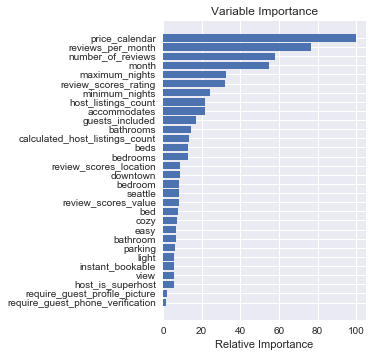

In [118]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_trainR.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Comparison between Predictors 

### With RFeatures 

In [119]:
R_RigdevsRF = pd.crosstab(y_ridgepredR, y_rfcR, margins=True)

R_RigdevsRF.rename(columns={0: 'RFC Predicted False', 1: 'RFC Predicted True'}, inplace=True)
R_RigdevsRF.rename(index={0: 'Ridge Predicted False', 1: 'Ridge Predicted True'}, inplace=True)
print('For RFeatures we have:')
display(R_RigdevsRF )

For RFeatures we have:


col_0,RFC Predicted False,RFC Predicted True,All
row_0,,,
Ridge Predicted False,5111,8878,13989
Ridge Predicted True,85158,876352,961510
All,90269,885230,975499


Look at where the models predicted different things ex: Ridge True vs RFC False

We want the model that predicts False more often.

This means Ridge is a better model in this case.

In [120]:
R_Rigdevsclf = pd.crosstab(y_ridgepredR, y_clfR, margins=True)

R_Rigdevsclf.rename(columns={0: 'GB Predicted False', 1: 'GB Predicted True'}, inplace=True)
R_Rigdevsclf.rename(index={0: 'Ridge Predicted False', 1: 'Ridge Predicted True'}, inplace=True)
print('For RFeatures we have:')
display(R_Rigdevsclf )

For RFeatures we have:


col_0,GB Predicted False,GB Predicted True,All
row_0,,,
Ridge Predicted False,6764,7225,13989
Ridge Predicted True,108180,853330,961510
All,114944,860555,975499


GB is way  better

In [121]:
R_clfvsRF = pd.crosstab(y_clfR, y_rfcR, margins=True)

R_clfvsRF.rename(columns={0: 'RFC Predicted False', 1: 'RFC Predicted True'}, inplace=True)
R_clfvsRF.rename(index={0: 'GB Predicted False', 1: 'GB Predicted True'}, inplace=True)
print('For RFeatures we have:')
display(R_clfvsRF )

For RFeatures we have:


col_0,RFC Predicted False,RFC Predicted True,All
row_0,,,
GB Predicted False,67689,47255,114944
GB Predicted True,22580,837975,860555
All,90269,885230,975499


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__   
__hyper params GB = 50 iterations, use 5-deep trees, and set our loss function = deviance.__    

<img src="1R_RigdevsRF.png">  


<img src="1R_Rigdevsclf.png">


<img src="1R_clfvsRF.png">


0_row == Ridge predicted False
1_row == Ridge predict True (available)


0_column == RFC Predicted False 
1_column ==RFC predicted True (availabe)


Which predicted more true values and fewer false values 

I should pick the one that predicted the best and compare to the other two 
And why the other ones might not be as good.   


### With KFeatures

In [122]:
K_RigdevsRF = pd.crosstab(y_ridgepredK, y_rfcK, margins=True)

K_RigdevsRF.rename(columns={0: 'RFC Predicted False', 1: 'RFC Predicted True'}, inplace=True)
K_RigdevsRF.rename(index={0: 'Ridge Predicted False', 1: 'Ridge Predicted True'}, inplace=True)
display(K_RigdevsRF )

col_0,RFC Predicted False,RFC Predicted True,All
row_0,,,
Ridge Predicted False,7262,9711,16973
Ridge Predicted True,59801,898725,958526
All,67063,908436,975499


In [123]:
K_Rigdevsclf = pd.crosstab(y_ridgepredK, y_clfK, margins=True)
K_Rigdevsclf.rename(columns={0: 'GB Predicted False', 1: 'GB Predicted True'}, inplace=True)
K_Rigdevsclf.rename(index={0: 'Ridge Predicted False', 1: 'Ridge Predicted True'}, inplace=True)
display(K_Rigdevsclf )

col_0,GB Predicted False,GB Predicted True,All
row_0,,,
Ridge Predicted False,8614,8359,16973
Ridge Predicted True,87836,870690,958526
All,96450,879049,975499


In [124]:
K_clfvsRF = pd.crosstab(y_clfK, y_rfcK, margins=True)

K_clfvsRF.rename(columns={0: 'RFC Predicted False', 1: 'RFC Predicted True'}, inplace=True)
K_clfvsRF.rename(index={0: 'GB Predicted False', 1: 'GB Predicted True'}, inplace=True)
display(K_clfvsRF )

col_0,RFC Predicted False,RFC Predicted True,All
row_0,,,
GB Predicted False,53238,43212,96450
GB Predicted True,13825,865224,879049
All,67063,908436,975499


### With Gradient Boosting Updated hyperparameters

In [125]:
R_clfvclf = pd.crosstab(y1_clfR , y2_clfR , margins=True)

R_clfvclf.rename(columns={0: '2nd R  GB Predicted False', 1: '2nd R Predicted True'}, inplace=True)
R_clfvclf.rename(index={0: '1st R GB Predicted False', 1: '1st R GB Predicted True'}, inplace=True)
display(R_clfvclf )

col_0,2nd R GB Predicted False,2nd R Predicted True,All
row_0,,,
1st R GB Predicted False,251882,6284,258166
1st R GB Predicted True,37214,680119,717333
All,289096,686403,975499


___Using 48 Keywords___  
__hyper param RFC = max_depth=10,max_features='auto', n_estimators=40__    
__ For SelectKbest k= 30__       
__hyper params GB = 50 iterations, use 5-deep trees, and set our loss function = deviance.__    

<img src="1K_RigdevsRF.png">  


<img src="1K_Rigdevsclf.png">


<img src="1R_clfvsRF.png">


## THINGS TO DO

What are the things in the dataframe.  
===> cast string as date time object   
===> feature engineering of Naive Bayes and Fit in the Random Forest   
===> Try to use SVM, GRAdient Boosting and one of the regression models    
==> Predict avaialable   

===> impute with mean and meadian for numeric data and do it for 20% of data is nan   
===> series.fillna()   

===> Unit 1 manipulating strings Filter , isdigit,    

available for calendar as outcome variable.    

===> Use numeric for all things    

===> Training test split (the regular one) do it right after the Joining of the sets    
===> Make sure to clean all data before joining (Final report)  

===> Start with Random Forest to see the important features   

===> remove Listing Price after updating calendar price.    

===> Time for CV print out too    

===> Extarct month out of date create new feature 

===> Run Random forest with Best_features   

===> Pulls some of the words from dfListings and see what we can do using do the text extraction from that part (AMAZON df)  

===> Do not do SVM  /Remove SVM  



===> select Kbest 
===> PCA with the modeling problem (reduce feature space)
====> look for more words for Keyword_a




===== Reoorder everything from Random Forest Classifier 

after 1st RFC do mode change 
1 if mode = R  do select best features rfc 

if moder = K  do select best features Kbest

change this
X_traing = X_train an

After that run 2nd RFC  Logistic and Gradient Boosting 

==> Change hyperparameters in each parameters and keep result in markdowns 
Show the results 


===> with the Logistic regression 
do a predict probability 
1 row from dataframe out and predict 

predict_proba(X_test)
compare it to Y_test

For logistic try L1 L2 and C high 

crossTab between 3 different methods 
table_train = pd.crosstab(y_ridg, y_rfc, margins=True)
To see how they are different from each other 

===============================

Summary chart with RFeatures 
Bars graphs with percentage of Type I errors, for each model 
The Score for each model 
The runtime for each model  
Runtime for Rfeatures and SelectKbest
Total runtime for each model (Feature Selection + model fit) 
Standard deviation 


Construct dataframes and numbers in them 
for doing the bar graphs


__
Dividing the FP by the Total Positive instead of The Total Negative (error for the Training set accuracy)
Dividing the FN by total Negative instead of Total Positive 
__

Make up up dummy data (grab a row of data) what is the prediction 
and see what I can do 
cof.predict_proba()
a list of probability of no and yes